In [1]:
import torch
import torch.nn as nn


In [34]:

# Model without BatchNorm
class MLP_No_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [54]:
# Create inputs
x = torch.tensor([
    [1.0,2.0,3.0],
    [4.0,5.0,6.0],
    [7.0,8.0,9.0]
])


In [55]:

# Run models
model_no_bn = MLP_No_BN()

print("Without BatchNorm:", model_no_bn(x))

Without BatchNorm: tensor([[0.6569],
        [1.2491],
        [1.8727]], grad_fn=<AddmmBackward0>)


In [56]:
# Model with BatchNorm
class MLP_With_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 3)
        self.batchnorm1 = nn.BatchNorm1d(3)  # Normalizing activations
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(3, 1)

    def forward(self, x):
        print(x)
        x = self.layer1(x)
        print(x)
        x = self.batchnorm1(x)  # Apply BatchNorm
        print("after bn", x)
        x = self.relu(x)
        print(x)
        x = self.layer2(x)
        print((x))
        return x

In [57]:
model_with_bn = MLP_With_BN()

print("With BatchNorm:", model_with_bn(x))

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[-1.1242, -1.1364, -1.7823],
        [-2.2971, -2.6796, -4.4150],
        [-3.4699, -4.2228, -7.0477]], grad_fn=<AddmmBackward0>)
after bn tensor([[ 1.2247e+00,  1.2247e+00,  1.2247e+00],
        [ 1.9926e-07,  2.4624e-07,  3.0469e-07],
        [-1.2247e+00, -1.2247e+00, -1.2247e+00]],
       grad_fn=<NativeBatchNormBackward0>)
tensor([[1.2247e+00, 1.2247e+00, 1.2247e+00],
        [1.9926e-07, 2.4624e-07, 3.0469e-07],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]], grad_fn=<ReluBackward0>)
tensor([[1.5145],
        [0.3430],
        [0.3430]], grad_fn=<AddmmBackward0>)
With BatchNorm: tensor([[1.5145],
        [0.3430],
        [0.3430]], grad_fn=<AddmmBackward0>)


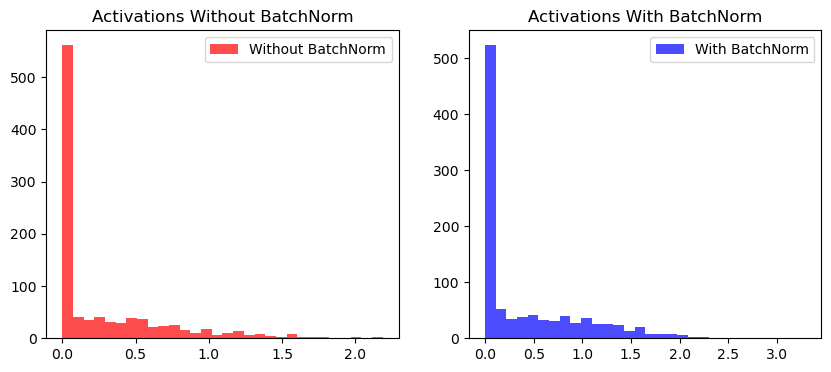

In [59]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Simple model without BatchNorm
class NoBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.fc(x))

# Simple model with BatchNorm
class WithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3, 10)
        self.bn = nn.BatchNorm1d(10)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.bn(self.fc(x)))

# Generate random data (batch of 100 samples, 3 features)
x = torch.randn(100, 3)

# Pass through models
model_no_bn = NoBatchNorm()
model_with_bn = WithBatchNorm()

out_no_bn = model_no_bn(x).detach().numpy()
out_with_bn = model_with_bn(x).detach().numpy()

# Plot activation distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(out_no_bn.flatten(), bins=30, alpha=0.7, color='red', label="Without BatchNorm")
plt.title("Activations Without BatchNorm")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(out_with_bn.flatten(), bins=30, alpha=0.7, color='blue', label="With BatchNorm")
plt.title("Activations With BatchNorm")
plt.legend()

plt.show()


In [68]:
# Sample input (batch of 4, 5 features)
# x = torch.randn(4, 5)
x = torch.tensor([
    [1.0,2.0,3.0],
    [4.0,5.0,6.0]
])
# BatchNorm and LayerNorm layers
batch_norm = nn.BatchNorm1d(3)  # Normalize across batch
layer_norm = nn.LayerNorm(3)     # Normalize across features

# Pass input through both
out_bn = batch_norm(x)
out_ln = layer_norm(x)

# Print results
print("Input:\n", x)
print("\nBatchNorm Output:\n", out_bn)
print("\nLayerNorm Output:\n", out_ln)


Input:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])

BatchNorm Output:
 tensor([[-1.0000, -1.0000, -1.0000],
        [ 1.0000,  1.0000,  1.0000]], grad_fn=<NativeBatchNormBackward0>)

LayerNorm Output:
 tensor([[-1.2247,  0.0000,  1.2247],
        [-1.2247,  0.0000,  1.2247]], grad_fn=<NativeLayerNormBackward0>)
